In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd

### Importar a base de dados

In [64]:
base = pd.read_csv('../../data/acoesPetrobras/greveCaminhoneiros/petr4_treinamento_ex.csv')

In [65]:
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


### remover colunas com valores nulos

In [66]:
base = base.dropna()

### Extrair colunas para treinamento

In [67]:
base_treinamento = base.iloc[:,1:2].values

In [68]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [24.23    ],
       [20.049999],
       [20.65    ]])

#### Normalizar a base de dados para uma escala de 0 a 1

In [69]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)


In [70]:
base_treinamento_normalizada

array([[0.68207343],
       [0.67429801],
       [0.69676026],
       ...,
       [0.86522678],
       [0.68466518],
       [0.71058315]])

#### Utilizar 90 datas anteriores para prever um valor


In [71]:
previsores = []
preco_real = []

In [72]:
for i in range(90, 1242):
    previsores.append(base_treinamento_normalizada[i-90:i,0])
    preco_real.append(base_treinamento_normalizada[i,0])

In [73]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [74]:
previsores = np.reshape(previsores,(previsores.shape[0], previsores.shape[1], 1))

#### Estrutura da Rede Neural

In [36]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [37]:
regressor.fit(previsores, preco_real, epochs=100, batch_size=32)

Epoch 1/100
1152/1152 [==============================] - 17s 15ms/step - loss: 0.0540 - mean_absolute_error: 0.1414
Epoch 2/100
1152/1152 [==============================] - 15s 13ms/step - loss: 0.0162 - mean_absolute_error: 0.1007
Epoch 3/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0995
Epoch 4/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0838
Epoch 5/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0104 - mean_absolute_error: 0.0779
Epoch 6/100
1152/1152 [==============================] - 19s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0718
Epoch 7/100
1152/1152 [==============================] - 17s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0688
Epoch 8/100
1152/1152 [==============================] - 20s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0661
Epoch 9/100
1152/1152 [==============================] - 20s 17ms/step -

1152/1152 [==============================] - 14s 12ms/step - loss: 0.0016 - mean_absolute_error: 0.0307
Epoch 72/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0309
Epoch 73/100
1152/1152 [==============================] - 13s 12ms/step - loss: 0.0016 - mean_absolute_error: 0.0298
Epoch 74/100
1152/1152 [==============================] - 16s 14ms/step - loss: 0.0016 - mean_absolute_error: 0.0302
Epoch 75/100
1152/1152 [==============================] - 13s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0290
Epoch 76/100
1152/1152 [==============================] - 15s 13ms/step - loss: 0.0015 - mean_absolute_error: 0.0289
Epoch 77/100
1152/1152 [==============================] - 14s 12ms/step - loss: 0.0016 - mean_absolute_error: 0.0297
Epoch 78/100
1152/1152 [==============================] - 13s 11ms/step - loss: 0.0015 - mean_absolute_error: 0.0293
Epoch 79/100
1152/1152 [==============================] - 15s 13ms/step - los

#### Realizar as previsões para a base de teste

In [109]:
base_teste = pd.read_csv('../../data/acoesPetrobras/greveCaminhoneiros/petr4_teste_ex.csv')

In [110]:
preco_real_teste = base_teste.iloc[:,1:2].values

In [111]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)

In [112]:
base_completa

0       19.990000
1       19.809999
2       20.330000
3       20.480000
4       20.110001
5       19.639999
6       19.770000
7       19.850000
8       20.010000
9       20.010000
10      19.889999
11      19.860001
12      19.799999
13      19.570000
14      19.420000
15      19.420000
16      19.370001
17      19.730000
18      19.350000
19      18.990000
20      18.260000
21      18.139999
22      18.160000
23      17.280001
24      17.930000
25      17.750000
26      17.549999
27      17.950001
28      17.790001
29      17.610001
          ...    
1334    25.830000
1335    25.850000
1336    26.350000
1337    26.870001
1338    27.350000
1339    25.010000
1340    26.100000
1341    24.809999
1342    24.230000
1343    20.049999
1344    20.650000
0       19.200001
1       18.000000
2       18.389999
3       19.559999
4       17.290001
5       17.360001
6       16.469999
7       16.000000
8       15.810000
9       15.500000
10      15.480000
11      15.420000
12      15.330000
13      15

In [113]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)

In [114]:
entradas = normalizador.transform(entradas)

In [115]:
entradas

array([[0.56803456],
       [0.59265659],
       [0.6112311 ],
       [0.6095032 ],
       [0.60734341],
       [0.61339093],
       [0.61425486],
       [0.65399568],
       [0.66609076],
       [0.66825054],
       [0.67257019],
       [0.6712743 ],
       [0.67213823],
       [0.69546432],
       [0.66738661],
       [0.62462203],
       [0.68120946],
       [0.66306691],
       [0.64060479],
       [0.63974082],
       [0.66090713],
       [0.65917922],
       [0.66306691],
       [0.67732177],
       [0.70799136],
       [0.70799136],
       [0.72354216],
       [0.74298056],
       [0.74600428],
       [0.75291572],
       [0.74298056],
       [0.71274302],
       [0.74686825],
       [0.79049676],
       [0.7555076 ],
       [0.76241901],
       [0.75939529],
       [0.79222467],
       [0.78833698],
       [0.78185741],
       [0.77105827],
       [0.74600428],
       [0.73736501],
       [0.73347732],
       [0.73650108],
       [0.76285102],
       [0.75205188],
       [0.771

In [125]:
x_teste = []
for i in range(90, 112):
    x_teste.append(entradas[i-90: i,0])
x_teste = pd.DataFrame(x_teste).to_numpy()
print(x_teste.shape[1])

90


In [126]:
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [127]:
previsoes = regressor.predict(x_teste)

In [128]:
previsoes = normalizador.inverse_transform(previsoes)

In [129]:
for i in range(len(preco_real_teste)):
    print('preco real:',preco_real_teste[i], 'previsao:', previsoes[i])

preco real: [19.200001] previsao: [19.628546]
preco real: [18.] previsao: [19.157738]
preco real: [18.389999] previsao: [18.24867]
preco real: [19.559999] previsao: [18.029564]
preco real: [17.290001] previsao: [18.939981]
preco real: [17.360001] previsao: [18.054981]
preco real: [16.469999] previsao: [17.314411]
preco real: [16.] previsao: [16.73804]
preco real: [15.81] previsao: [16.298841]
preco real: [15.5] previsao: [16.012432]
preco real: [15.48] previsao: [15.731849]
preco real: [15.42] previsao: [15.576871]
preco real: [15.33] previsao: [15.504107]
preco real: [15.03] previsao: [15.423028]
preco real: [14.77] previsao: [15.2066345]
preco real: [14.26] previsao: [14.936147]
preco real: [15.84] previsao: [14.5507765]
preco real: [16.09] previsao: [15.216022]
preco real: [15.41] previsao: [15.939175]


In [130]:
import matplotlib.pyplot as plt

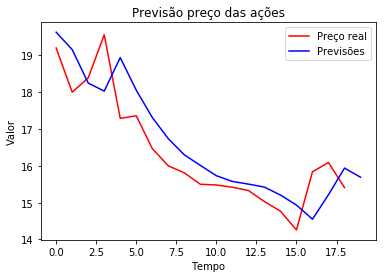

In [131]:
plt.plot(preco_real_teste, color = 'red', label='Preço real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()